<a href="https://colab.research.google.com/github/Anish150198/Recommendation-System/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Load Packages and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

Step 1: Data Loading

In [ ]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('/content/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

Step 1.1: Data Preprocessing

In [ ]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


Basic Operation and Data refining

In [ ]:
train_data['Product Tags']

,Product Tags
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,"Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...
4995,"Garden Mint Room Spray (Double Strength), 4 ou..."
4996,Garnier Nutrisse Nourishing Hair Color Creme (...
4997,"Nail File Electric Drill, 6 in 1 Professional ..."
4998,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [ ]:
train_data.shape

(5000, 10)

In [ ]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,2806
Product Reviews Count,1654
Product Category,10
Product Brand,13
Product Name,0
Product Image Url,0
Product Description,1127
Product Tags,0


In [ ]:
# Replace missing values in 'Product Rating' with 0 as the default value
train_data['Product Rating'].fillna(0, inplace=True)

# Replace missing values in 'Product Reviews Count' with 0 as the default value
train_data['Product Reviews Count'].fillna(0, inplace=True)

# Replace missing values in 'Product Category' with 'Unknown' to indicate missing information
train_data['Product Category'].fillna('Unknown', inplace=True)

# Replace missing values in 'Product Brand' with 'Unknown' to indicate missing information
train_data['Product Brand'].fillna('Unknown', inplace=True)

# Replace missing values in 'Product Description' with an empty string to avoid null entries
train_data['Product Description'].fillna('', inplace=True)

<ipython-input-23-e69f6885f6e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0, inplace=True)
<ipython-input-23-e69f6885f6e2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,0
Product Image Url,0
Product Description,0
Product Tags,0


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
# Create a mapping of original column names to shorter, more concise names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

# Apply the column name mapping to rename the columns in the dataset
train_data.rename(columns=column_name_mapping, inplace=True)


In [ ]:
# Extract numeric values from the 'ID' column and convert them to float
# The regex pattern '(\d+)' captures one or more digits
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

# Extract numeric values from the 'ProdID' column and convert them to float
# The regex pattern '(\d+)' captures one or more digits
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)


Step 2: Data Exploration and Visualization

In [ ]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


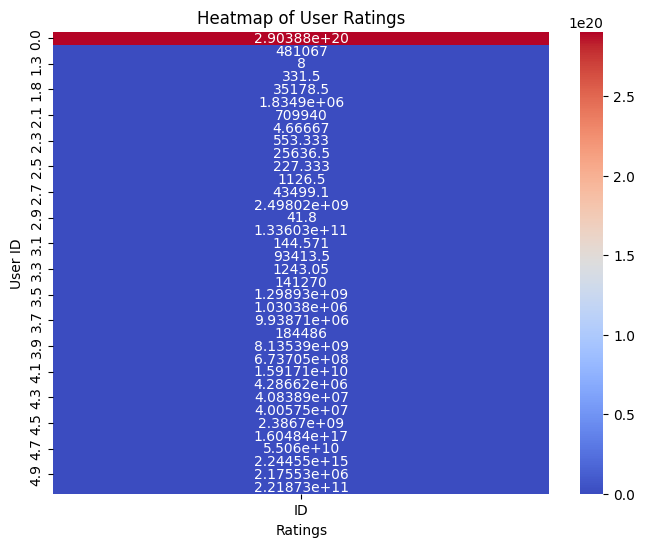

In [ ]:
# Pivot the DataFrame to aggregate data for the heatmap (using 'ID' as the values and 'Rating' as the index)
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Generate and display the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

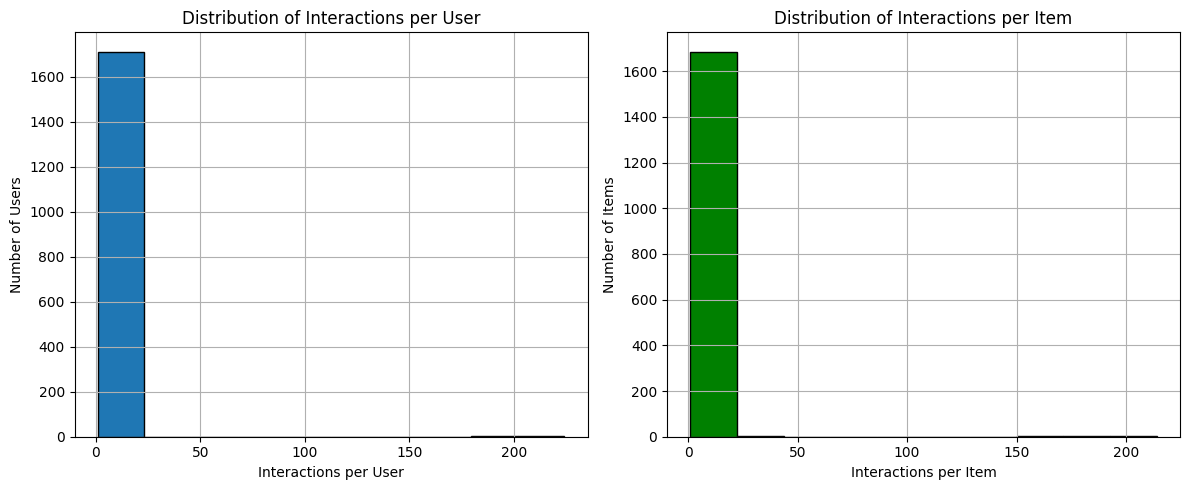

In [ ]:
# Visualize the distribution of user and item interactions
plt.figure(figsize=(12, 5))

# Plot the distribution of interactions per user
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')  # Count interactions for each user and plot the histogram
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

# Plot the distribution of interactions per item
plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k', color='green')  # Count interactions for each item and plot the histogram
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

# Adjust layout for better spacing and display the plots
plt.tight_layout()
plt.show()


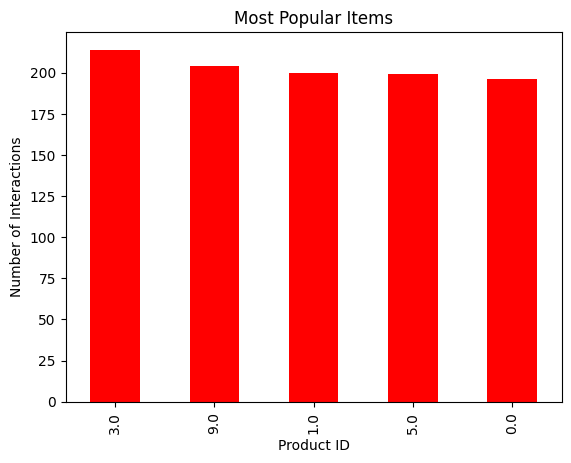

In [ ]:
# Identify the 5 most popular items based on the frequency of their occurrences in the 'ProdID' column
popular_items = train_data['ProdID'].value_counts().head(5)

# Plot a bar chart of the most popular items
popular_items.plot(kind='bar', color='red')
plt.title("Most Popular Items")  # Set the title of the chart
plt.xlabel("Product ID")         # Label the x-axis as 'Product ID'
plt.ylabel("Number of Interactions")  # Label the y-axis as 'Number of Interactions'
plt.show()  # Display the plot


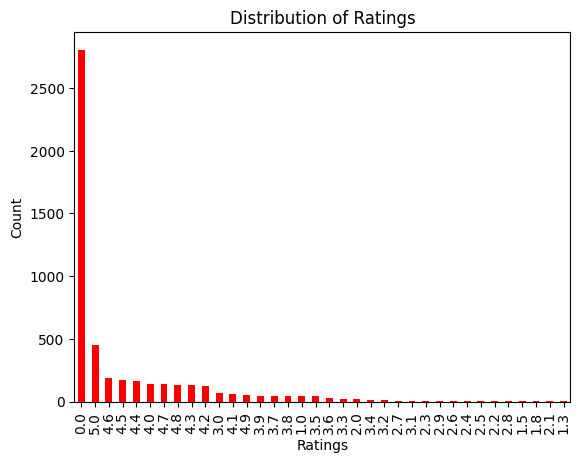

In [ ]:
# Count the occurrences of each unique rating in the 'Rating' column
# Plot the distribution of ratings as a bar chart
train_data['Rating'].value_counts().plot(kind='bar', color='red')

# Add labels and a title for clarity
plt.title("Distribution of Ratings")  # Set the title of the chart
plt.xlabel("Ratings")                # Label the x-axis as 'Ratings'
plt.ylabel("Count")                  # Label the y-axis as 'Count'
plt.show()  # Display the plot


Step 3: Data Cleaning and Tags Creations

In [ ]:
# Import necessary libraries for NLP and stop word handling
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the small English model from spaCy for text processing
nlp = spacy.load("en_core_web_sm")

# Define a function to clean text and extract meaningful tags
def clean_and_extract_tags(text):
    # Convert text to lowercase and process it with spaCy
    doc = nlp(text.lower())
    # Extract alphanumeric tokens that are not stop words
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    # Return tags as a comma-separated string
    return ', '.join(tags)

# Specify the columns from which tags should be extracted
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

# Apply the tag extraction function to each specified column
for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)


In [ ]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

Rating Base Recommendations System

In [ ]:
# Calculate the average ratings for products based on their Name, ReviewCount, Brand, and ImageURL
# Group by these attributes and compute the mean rating for each group
average_ratings = train_data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()

# Reset index ensures that the grouped columns are included as regular columns in the resulting DataFrame


In [ ]:
# Sort the average ratings in descending order to get the top-rated items
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

# Select the top 10 highest-rated items for recommendation
rating_base_recommendation = top_rated_items.head(10)


In [ ]:
# Convert the 'Rating' column to integer data type
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)

# Convert the 'ReviewCount' column to integer data type
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


<ipython-input-38-bef329f82fd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
<ipython-input-38-bef329f82fd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [ ]:
# Print a message indicating that the Rating Base Recommendation System for trending products is being displayed
print("Rating Base Recommendation System: (Trending Products)")

# Display the relevant columns for top-rated recommendations: Name, Rating, ReviewCount, Brand, and ImageURL
rating_base_recommendation[['Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']]


Rating Base Recommendation System: (Trending Products)


,Name,Rating,ReviewCount,Brand,ImageURL
1686,"Electric Shaver, Triple Shaving Time Electric ...",5,4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...
526,"Alaffia Body Lotion, Vanilla, 32 Oz",5,2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",5,2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",5,24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,5,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",5,1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",5,1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,5,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,5,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",5,1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...


Content-Based Recommendation System (Based on User Preferences or Item Similarities)

In [ ]:
# Import TfidfVectorizer from sklearn for text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF matrix for item tags using stop words from English
# TF-IDF (Term Frequency-Inverse Document Frequency) is used to represent text data by assigning weights to terms based on their importance across documents
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Tags' column to create the TF-IDF matrix
# Each row represents a document (item), and each column represents a term with its corresponding TF-IDF value
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

# Compute cosine similarity between items based on their TF-IDF representations
# Cosine similarity measures the similarity between two vectors, with values ranging from 0 (completely different) to 1 (identical)
cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)


In [ ]:
# Define the name of the item for which recommendations are to be made
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

# Get the index of the specified item from the train_data DataFrame
# We search for the item by its 'Name' column and retrieve its corresponding index
item_index = train_data[train_data['Name'] == item_name].index[0]
item_index

0

In [ ]:
# Generate a list of tuples containing item indices and their corresponding cosine similarity values with the specified item
# This will help in sorting similar items based on similarity scores
similar_items = list(enumerate(cosine_similarities_content[item_index]))


In [ ]:
# Sort the list of similar items based on their cosine similarity scores in descending order
# This ensures that items with the highest similarity scores are at the top
similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

# Select the top 9 most similar items (excluding the first item itself, which is the specified item)
top_similar_items = similar_items[1:10]

# Extract the indices of the top recommended items from the sorted list of similar items
# This creates a list of indices corresponding to the top similar items
recommended_items_indices = [x[0] for x in top_similar_items]



In [ ]:
# Retrieve the details (Name, ReviewCount, and Brand) of the recommended items based on their indices
train_data.iloc[recommended_items_indices][['Name', 'ReviewCount', 'Brand']]


,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


Function To Recommend Products for Content Base

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details


In [ ]:
# Example: Get content-based recommendations for a specific item

# Define the item name for which recommendations are needed
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

# Call the content-based recommendations function
# Pass the training data, item name, and the number of top recommendations (top_n)
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

# Display the recommended items
content_based_rec


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [ ]:
# Example: Get content-based recommendations for a specific item

# Define the item name for which recommendations are needed
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'

# Call the content-based recommendations function
# Pass the training data, item name, and the number of top recommendations (top_n)
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

# Display the recommended items
content_based_rec


,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


Collaborative Filtering (User Item Similarity)

In [ ]:
# Creating a user-item matrix
# The matrix has users as rows, items (Product IDs) as columns, and average ratings as values

# Create a pivot table with 'ID' (user) as index, 'ProdID' (item) as columns, and average 'Rating' as values
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)


In [ ]:
# Compute user-user similarity using cosine similarity

# Compute cosine similarity between users based on their ratings
user_similarity = cosine_similarity(user_item_matrix)


In [ ]:
# Finding the index of the target user in the user-item matrix
target_user_id = 4
# Get the index of the target user ID in the user-item matrix
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [ ]:
# Get similarity scores for the target user
user_similarities = user_similarity[target_user_index]

# Sort the similarity scores in descending order and exclude the target user itself
similar_user_indices = user_similarities.argsort()[::-1][1:]


In [ ]:
# Recommending items based on similar users' ratings

recommend_items = []  # List to store recommended items

# Iterate through indices of users similar to the target user
for user_index in similar_user_indices:
    # Get the items rated by a similar user
    rated_by_similar_user = user_item_matrix.iloc[user_index]

    # Find items not rated by the target user but rated by a similar user
    not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

    # Add top 10 items not rated by the target user to the recommendation list
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

# Get details of recommended items
recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]


In [ ]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


Function That Recommend Items

In [ ]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec


Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


Hybrid Recommendations

In [ ]:
def hybrid_recommendations(train_data, target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data, item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)


In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4  # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data, target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec


Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10  # Specify the user_id for which recommendations are needed
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'  # Specify the item name for content-based recommendations

# Get hybrid recommendations
hybrid_rec = hybrid_recommendations(train_data, target_user_id, item_name, top_n=10)

# Print the top 10 hybrid recommendations
print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec


Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0
